# App Data Analysis With Time series Data

#### Importing necessary  libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the App data set


In [2]:
data = pd.read_csv('App_data.csv')

# Display first five rows

data.head()

,Date,New Installs,Returning Users,Uninstalls,Net new installs,Uninstall rate,DAU,Unique Page Views,Page view conversion,Add to Cart,A2C Conv,AddtoCart (Prod page),Order Comp,Overall Conv,Unnamed: 14,Unnamed: 15
0,01-Sep-21,"6,012",715,"2,538","4,738",42.22%,"13,421",4098,30.53%,1316,9.81%,32.11%,460,3.43%,NaN,NaN
1,02-Sep-21,"9,327",617,"2,364","5,725",25.35%,"15,858",5068,31.96%,1313,8.28%,25.91%,521,3.29%,NaN,NaN
2,03-Sep-21,"10,415",786,"1,552","6,222",14.90%,"15,832",4669,29.49%,1214,7.67%,26.00%,311,1.96%,NaN,NaN
3,04-Sep-21,"12,312",765,"2,736","6,258",22.22%,"17,144",5023,29.30%,1328,7.75%,26.44%,435,2.54%,NaN,NaN
4,05-Sep-21,"15,719",944,"3,288","5,532",20.92%,"18,753",4599,24.52%,1393,7.43%,30.29%,438,2.34%,NaN,NaN


In [3]:
data.columns

Index(['Date', 'New Installs ', 'Returning Users ', 'Uninstalls ',
       'Net new installs ', 'Uninstall rate', 'DAU ', 'Unique Page Views',
       'Page view conversion', 'Add to Cart', 'A2C Conv',
       'AddtoCart (Prod page)', 'Order Comp', 'Overall Conv', 'Unnamed: 14',
       'Unnamed: 15'],
      dtype='object')

In [4]:
# Return a tuple representing the dimensionality of the DataFrame

data.shape

(112, 16)

In [5]:
# Return an int representing the number of elements

data.size

1792

In [6]:
# information about a DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   112 non-null    object 
 1   New Installs           112 non-null    object 
 2   Returning Users        112 non-null    object 
 3   Uninstalls             112 non-null    object 
 4   Net new installs       112 non-null    object 
 5   Uninstall rate         112 non-null    object 
 6   DAU                    112 non-null    object 
 7   Unique Page Views      112 non-null    int64  
 8   Page view conversion   112 non-null    object 
 9   Add to Cart            112 non-null    int64  
 10  A2C Conv               112 non-null    object 
 11  AddtoCart (Prod page)  112 non-null    object 
 12  Order Comp             112 non-null    int64  
 13  Overall Conv           112 non-null    object 
 14  Unnamed: 14            0 non-null      float64
 15  Unname

#### Removing redundant columns

In [7]:
data.drop(['Unnamed: 14', 'Unnamed: 15'], axis=1, inplace=True)
data

,Date,New Installs,Returning Users,Uninstalls,Net new installs,Uninstall rate,DAU,Unique Page Views,Page view conversion,Add to Cart,A2C Conv,AddtoCart (Prod page),Order Comp,Overall Conv
0,01-Sep-21,"6,012",715,"2,538","4,738",42.22%,"13,421",4098,30.53%,1316,9.81%,32.11%,460,3.43%
1,02-Sep-21,"9,327",617,"2,364","5,725",25.35%,"15,858",5068,31.96%,1313,8.28%,25.91%,521,3.29%
2,03-Sep-21,"10,415",786,"1,552","6,222",14.90%,"15,832",4669,29.49%,1214,7.67%,26.00%,311,1.96%
3,04-Sep-21,"12,312",765,"2,736","6,258",22.22%,"17,144",5023,29.30%,1328,7.75%,26.44%,435,2.54%
4,05-Sep-21,"15,719",944,"3,288","5,532",20.92%,"18,753",4599,24.52%,1393,7.43%,30.29%,438,2.34%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,17-Dec-21,"18,208","1,703","4,573","10,813",25.12%,"37,544",10308,27.46%,2934,7.81%,28.46%,772,2.06%
108,18-Dec-21,"15,839","1,586","3,612","11,520",22.80%,"29,238",11095,37.95%,2976,10.18%,26.82%,784,2.68%
109,19-Dec-21,"20,939","1,643","4,349","10,290",20.77%,"32,057",9182,28.64%,2374,7.41%,25.85%,588,1.83%
110,20-Dec-21,"18,982","1,711","3,027","10,297",15.95%,"35,508",9399,26.47%,3202,9.02%,34.07%,783,2.21%


### Data Cleaning

#### Removing spaces from column names

In [8]:
data.columns = ['Date', 'New_Installs', 'Returning_Users','Uninstalls','Net_new_installs','Uninstall_rate_per_','DAU','Unique_Page_Views','Page_view_conversion_per_','Add_to_Cart','A2C_Conv_per_','AddtoCart_(Prod page)_per_','Order_Comp','Overall_Conv_per_']
data  

,Date,New_Installs,Returning_Users,Uninstalls,Net_new_installs,Uninstall_rate_per_,DAU,Unique_Page_Views,Page_view_conversion_per_,Add_to_Cart,A2C_Conv_per_,AddtoCart_(Prod page)_per_,Order_Comp,Overall_Conv_per_
0,01-Sep-21,"6,012",715,"2,538","4,738",42.22%,"13,421",4098,30.53%,1316,9.81%,32.11%,460,3.43%
1,02-Sep-21,"9,327",617,"2,364","5,725",25.35%,"15,858",5068,31.96%,1313,8.28%,25.91%,521,3.29%
2,03-Sep-21,"10,415",786,"1,552","6,222",14.90%,"15,832",4669,29.49%,1214,7.67%,26.00%,311,1.96%
3,04-Sep-21,"12,312",765,"2,736","6,258",22.22%,"17,144",5023,29.30%,1328,7.75%,26.44%,435,2.54%
4,05-Sep-21,"15,719",944,"3,288","5,532",20.92%,"18,753",4599,24.52%,1393,7.43%,30.29%,438,2.34%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,17-Dec-21,"18,208","1,703","4,573","10,813",25.12%,"37,544",10308,27.46%,2934,7.81%,28.46%,772,2.06%
108,18-Dec-21,"15,839","1,586","3,612","11,520",22.80%,"29,238",11095,37.95%,2976,10.18%,26.82%,784,2.68%
109,19-Dec-21,"20,939","1,643","4,349","10,290",20.77%,"32,057",9182,28.64%,2374,7.41%,25.85%,588,1.83%
110,20-Dec-21,"18,982","1,711","3,027","10,297",15.95%,"35,508",9399,26.47%,3202,9.02%,34.07%,783,2.21%


#### Removing , from the column values

In [9]:
data['New_Installs']=data['New_Installs'].str.replace(',','')
data['Uninstalls']=data['Uninstalls'].str.replace(',','')
data['Net_new_installs']=data['Net_new_installs'].str.replace(',','')
data['DAU']=data['DAU'].str.replace(',','')
data['Returning_Users']=data['Returning_Users'].str.replace(',','')
data

,Date,New_Installs,Returning_Users,Uninstalls,Net_new_installs,Uninstall_rate_per_,DAU,Unique_Page_Views,Page_view_conversion_per_,Add_to_Cart,A2C_Conv_per_,AddtoCart_(Prod page)_per_,Order_Comp,Overall_Conv_per_
0,01-Sep-21,6012,715,2538,4738,42.22%,13421,4098,30.53%,1316,9.81%,32.11%,460,3.43%
1,02-Sep-21,9327,617,2364,5725,25.35%,15858,5068,31.96%,1313,8.28%,25.91%,521,3.29%
2,03-Sep-21,10415,786,1552,6222,14.90%,15832,4669,29.49%,1214,7.67%,26.00%,311,1.96%
3,04-Sep-21,12312,765,2736,6258,22.22%,17144,5023,29.30%,1328,7.75%,26.44%,435,2.54%
4,05-Sep-21,15719,944,3288,5532,20.92%,18753,4599,24.52%,1393,7.43%,30.29%,438,2.34%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,17-Dec-21,18208,1703,4573,10813,25.12%,37544,10308,27.46%,2934,7.81%,28.46%,772,2.06%
108,18-Dec-21,15839,1586,3612,11520,22.80%,29238,11095,37.95%,2976,10.18%,26.82%,784,2.68%
109,19-Dec-21,20939,1643,4349,10290,20.77%,32057,9182,28.64%,2374,7.41%,25.85%,588,1.83%
110,20-Dec-21,18982,1711,3027,10297,15.95%,35508,9399,26.47%,3202,9.02%,34.07%,783,2.21%


#### Removing % from the column values

In [10]:
data['Uninstall_rate_per_']=data['Uninstall_rate_per_'].str.replace('%','')
data['Page_view_conversion_per_']=data['Page_view_conversion_per_'].str.replace('%','')
data['A2C_Conv_per_']=data['A2C_Conv_per_'].str.replace('%','')
data['AddtoCart_(Prod page)_per_']=data['AddtoCart_(Prod page)_per_'].str.replace('%','')
data['Overall_Conv_per_']=data['Overall_Conv_per_'].str.replace('%','')

data

,Date,New_Installs,Returning_Users,Uninstalls,Net_new_installs,Uninstall_rate_per_,DAU,Unique_Page_Views,Page_view_conversion_per_,Add_to_Cart,A2C_Conv_per_,AddtoCart_(Prod page)_per_,Order_Comp,Overall_Conv_per_
0,01-Sep-21,6012,715,2538,4738,42.22,13421,4098,30.53,1316,9.81,32.11,460,3.43
1,02-Sep-21,9327,617,2364,5725,25.35,15858,5068,31.96,1313,8.28,25.91,521,3.29
2,03-Sep-21,10415,786,1552,6222,14.90,15832,4669,29.49,1214,7.67,26.00,311,1.96
3,04-Sep-21,12312,765,2736,6258,22.22,17144,5023,29.30,1328,7.75,26.44,435,2.54
4,05-Sep-21,15719,944,3288,5532,20.92,18753,4599,24.52,1393,7.43,30.29,438,2.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,17-Dec-21,18208,1703,4573,10813,25.12,37544,10308,27.46,2934,7.81,28.46,772,2.06
108,18-Dec-21,15839,1586,3612,11520,22.80,29238,11095,37.95,2976,10.18,26.82,784,2.68
109,19-Dec-21,20939,1643,4349,10290,20.77,32057,9182,28.64,2374,7.41,25.85,588,1.83
110,20-Dec-21,18982,1711,3027,10297,15.95,35508,9399,26.47,3202,9.02,34.07,783,2.21


In [11]:
# Display first five rows

data.head()

,Date,New_Installs,Returning_Users,Uninstalls,Net_new_installs,Uninstall_rate_per_,DAU,Unique_Page_Views,Page_view_conversion_per_,Add_to_Cart,A2C_Conv_per_,AddtoCart_(Prod page)_per_,Order_Comp,Overall_Conv_per_
0,01-Sep-21,6012,715,2538,4738,42.22,13421,4098,30.53,1316,9.81,32.11,460,3.43
1,02-Sep-21,9327,617,2364,5725,25.35,15858,5068,31.96,1313,8.28,25.91,521,3.29
2,03-Sep-21,10415,786,1552,6222,14.90,15832,4669,29.49,1214,7.67,26.00,311,1.96
3,04-Sep-21,12312,765,2736,6258,22.22,17144,5023,29.30,1328,7.75,26.44,435,2.54
4,05-Sep-21,15719,944,3288,5532,20.92,18753,4599,24.52,1393,7.43,30.29,438,2.34


In [12]:
# information about a DataFrame


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        112 non-null    object
 1   New_Installs                112 non-null    object
 2   Returning_Users             112 non-null    object
 3   Uninstalls                  112 non-null    object
 4   Net_new_installs            112 non-null    object
 5   Uninstall_rate_per_         112 non-null    object
 6   DAU                         112 non-null    object
 7   Unique_Page_Views           112 non-null    int64 
 8   Page_view_conversion_per_   112 non-null    object
 9   Add_to_Cart                 112 non-null    int64 
 10  A2C_Conv_per_               112 non-null    object
 11  AddtoCart_(Prod page)_per_  112 non-null    object
 12  Order_Comp                  112 non-null    int64 
 13  Overall_Conv_per_           112 non-null    object

In [13]:
# To detect missing values

data.isnull().sum()

Date                          0
New_Installs                  0
Returning_Users               0
Uninstalls                    0
Net_new_installs              0
Uninstall_rate_per_           0
DAU                           0
Unique_Page_Views             0
Page_view_conversion_per_     0
Add_to_Cart                   0
A2C_Conv_per_                 0
AddtoCart_(Prod page)_per_    0
Order_Comp                    0
Overall_Conv_per_             0
dtype: int64

#### Converting Data Type of the columns

In [14]:
data['Uninstalls'] = data['Uninstalls'].astype("int16")
data['Net_new_installs'] = data['Net_new_installs'].astype("int16")
data['New_Installs'] = data['New_Installs'].astype("int16")
data['Returning_Users'] = data['Returning_Users'].astype('int16')

In [15]:
data['Uninstall_rate_per_'] = data['Uninstall_rate_per_'].astype("float16")
data['Page_view_conversion_per_'] = data['Page_view_conversion_per_'].astype("float16")
data['AddtoCart_(Prod page)_per_'] = data['AddtoCart_(Prod page)_per_'].astype("float16")
data['Overall_Conv_per_'] = data['Overall_Conv_per_'].astype("float16")
data['A2C_Conv_per_'] = data['A2C_Conv_per_'].astype("float16")

In [16]:
data['DAU'] = data['DAU'].astype("int32")

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        112 non-null    object 
 1   New_Installs                112 non-null    int16  
 2   Returning_Users             112 non-null    int16  
 3   Uninstalls                  112 non-null    int16  
 4   Net_new_installs            112 non-null    int16  
 5   Uninstall_rate_per_         112 non-null    float16
 6   DAU                         112 non-null    int32  
 7   Unique_Page_Views           112 non-null    int64  
 8   Page_view_conversion_per_   112 non-null    float16
 9   Add_to_Cart                 112 non-null    int64  
 10  A2C_Conv_per_               112 non-null    float16
 11  AddtoCart_(Prod page)_per_  112 non-null    float16
 12  Order_Comp                  112 non-null    int64  
 13  Overall_Conv_per_           112 non

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

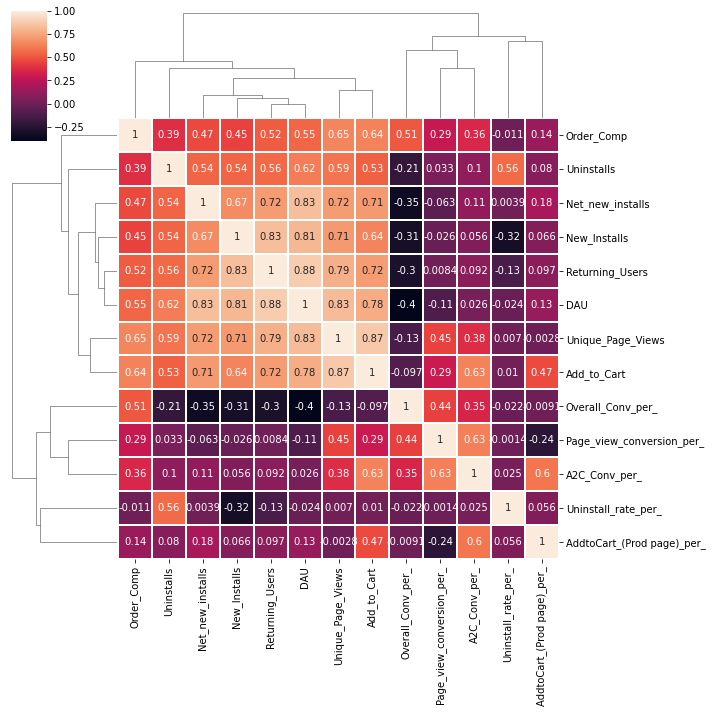

In [18]:
#Compute pairwise correlation of columns, excluding NA/null values.

data_corr = data.corr()
fig = sns.clustermap(data_corr, annot=True, linewidth=0.4)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(),rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(),rotation=90)


In [19]:
# If the correlation coefficient is positive, i.e. 0<r⩽1,
# then the two variables are said to be positively correlated. In other words,
# if with an increase in the value of one variable, 
# the value of the other variable is increasing as well, then they are positively correlated.

#### To Change format of Date column

In [20]:
data['Date']  = pd.to_datetime(data['Date'])
data['Date'] 

0     2021-09-01
1     2021-09-02
2     2021-09-03
3     2021-09-04
4     2021-09-05
         ...    
107   2021-12-17
108   2021-12-18
109   2021-12-19
110   2021-12-20
111   2021-12-21
Name: Date, Length: 112, dtype: datetime64[ns]

In [21]:
data.head()

,Date,New_Installs,Returning_Users,Uninstalls,Net_new_installs,Uninstall_rate_per_,DAU,Unique_Page_Views,Page_view_conversion_per_,Add_to_Cart,A2C_Conv_per_,AddtoCart_(Prod page)_per_,Order_Comp,Overall_Conv_per_
0,2021-09-01,6012,715,2538,4738,42.218750,13421,4098,30.531250,1316,9.812500,32.125000,460,3.429688
1,2021-09-02,9327,617,2364,5725,25.343750,15858,5068,31.953125,1313,8.281250,25.906250,521,3.289062
2,2021-09-03,10415,786,1552,6222,14.898438,15832,4669,29.484375,1214,7.671875,26.000000,311,1.959961
3,2021-09-04,12312,765,2736,6258,22.218750,17144,5023,29.296875,1328,7.750000,26.437500,435,2.539062
4,2021-09-05,15719,944,3288,5532,20.921875,18753,4599,24.515625,1393,7.429688,30.296875,438,2.339844


#### Monthly Average values

In [22]:
data['Month'] = data['Date'].dt.month
data_monthly_avg =data.pivot_table(columns='Month',aggfunc='mean')

In [23]:
data_monthly_avg.columns = ['Sep','Oct','Nov','Dec']
data_monthly_avg

,Sep,Oct,Nov,Dec
A2C_Conv_per_,7.093750,8.039062,6.472656,8.125000
Add_to_Cart,1251.866667,1447.967742,1581.866667,2444.523810
AddtoCart_(Prod page)_per_,27.062500,25.390625,23.265625,29.562500
DAU,17864.433333,17586.677419,24693.333333,29965.000000
Net_new_installs,6562.333333,5993.709677,7849.333333,9949.333333
New_Installs,11042.666667,9629.387097,13661.833333,15753.142857
Order_Comp,381.100000,472.741935,521.500000,586.809524
Overall_Conv_per_,2.164062,2.718750,2.162109,1.958008
Page_view_conversion_per_,26.328125,31.718750,28.078125,27.671875
Returning_Users,804.933333,861.000000,1259.266667,1515.000000


Main factors that are affecting Overall Conversion percentage are 

2.164062	2.718750	2.162109	1.958008

Order_Comp (positive effect)

381.100000	472.741935	521.500000	586.809524

Page_view_conversion_per_ (positive effect)

26.328125	31.718750	28.078125	27.671875

DAU

17864.433333	17586.677419	24693.333333	29965.000000

DAU Increased from 17586 in September to 29965 in December which lead to decrease in  Overall Conversion 


A2C_Conv_per_ (positive effect)

7.093750	8.039062	6.472656	8.125000


Net_new_installs

6562.333333	5993.709677	7849.333333	9949.333333

Net_new_installs Increased from 5993 in September to 9949 in December which lead to decrease in  Overall Conversion 

Returning_Users

804.933333	861.000000	1259.266667	1515.000000

Returning_Users Increased from 861 in September to 1515 in December which lead to decrease in  Overall Conversion 

In [24]:
data.set_index('Date', inplace=True)
data.head()

,New_Installs,Returning_Users,Uninstalls,Net_new_installs,Uninstall_rate_per_,DAU,Unique_Page_Views,Page_view_conversion_per_,Add_to_Cart,A2C_Conv_per_,AddtoCart_(Prod page)_per_,Order_Comp,Overall_Conv_per_,Month
Date,,,,,,,,,,,,,,
2021-09-01,6012,715,2538,4738,42.218750,13421,4098,30.531250,1316,9.812500,32.125000,460,3.429688,9
2021-09-02,9327,617,2364,5725,25.343750,15858,5068,31.953125,1313,8.281250,25.906250,521,3.289062,9
2021-09-03,10415,786,1552,6222,14.898438,15832,4669,29.484375,1214,7.671875,26.000000,311,1.959961,9
2021-09-04,12312,765,2736,6258,22.218750,17144,5023,29.296875,1328,7.750000,26.437500,435,2.539062,9
2021-09-05,15719,944,3288,5532,20.921875,18753,4599,24.515625,1393,7.429688,30.296875,438,2.339844,9


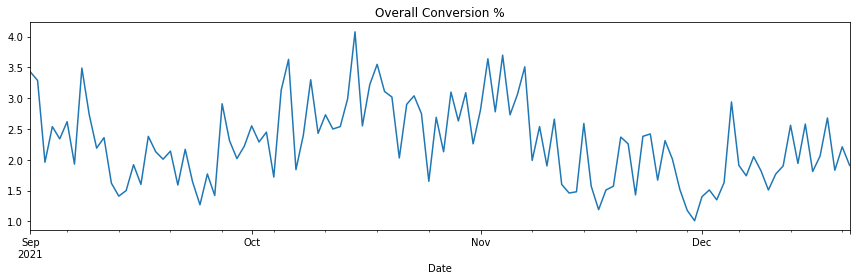

In [25]:
data.Overall_Conv_per_.plot(title='Overall Conversion %',figsize=(12,4))
plt.tight_layout()
plt.show()

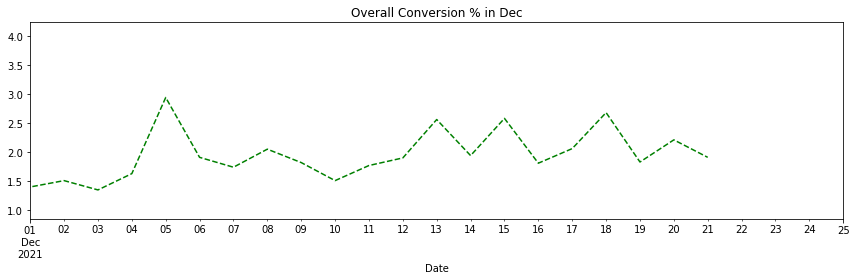

In [26]:
data.Overall_Conv_per_.plot(xlim=['2021-12-01','2021-12-25'],title='Overall Conversion % in Dec',ls='--',c='g',figsize=(12,4))
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'conversion % in Dec'}, xlabel='Date'>

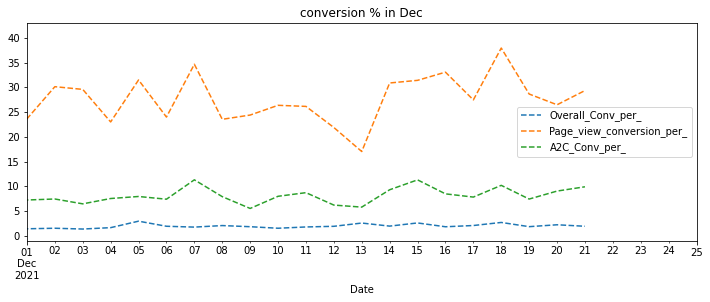

In [27]:
pd.concat([data['Overall_Conv_per_'], data['Page_view_conversion_per_'],data['A2C_Conv_per_']] 
          , axis=1).plot(xlim=['2021-12-01','2021-12-25'],title='conversion % in Dec',ls='--',figsize=(12,4))


<AxesSubplot:title={'center':'conversion % in Nov'}, xlabel='Date'>

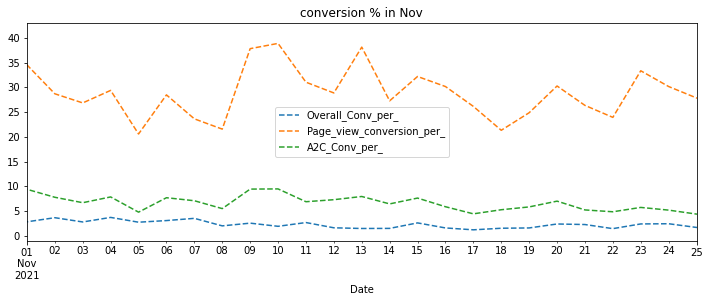

In [28]:
pd.concat([data['Overall_Conv_per_'], data['Page_view_conversion_per_'],data['A2C_Conv_per_']] 
          , axis=1).plot(xlim=['2021-11-01','2021-11-25'],title='conversion % in Nov',ls='--',figsize=(12,4))

array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>]],
      dtype=object)

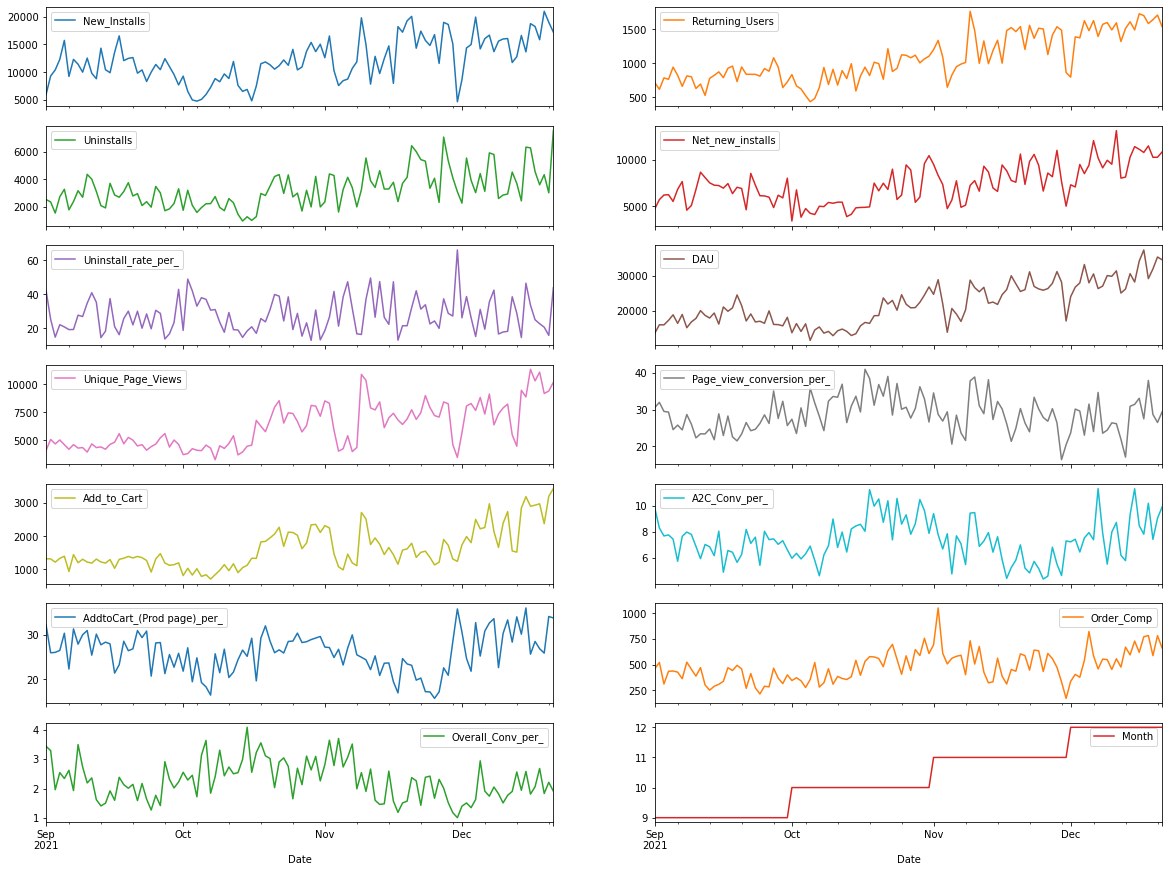

In [29]:
data.plot(subplots = True, layout = (7,2),figsize = (20,15),sharex = True,sharey = False)

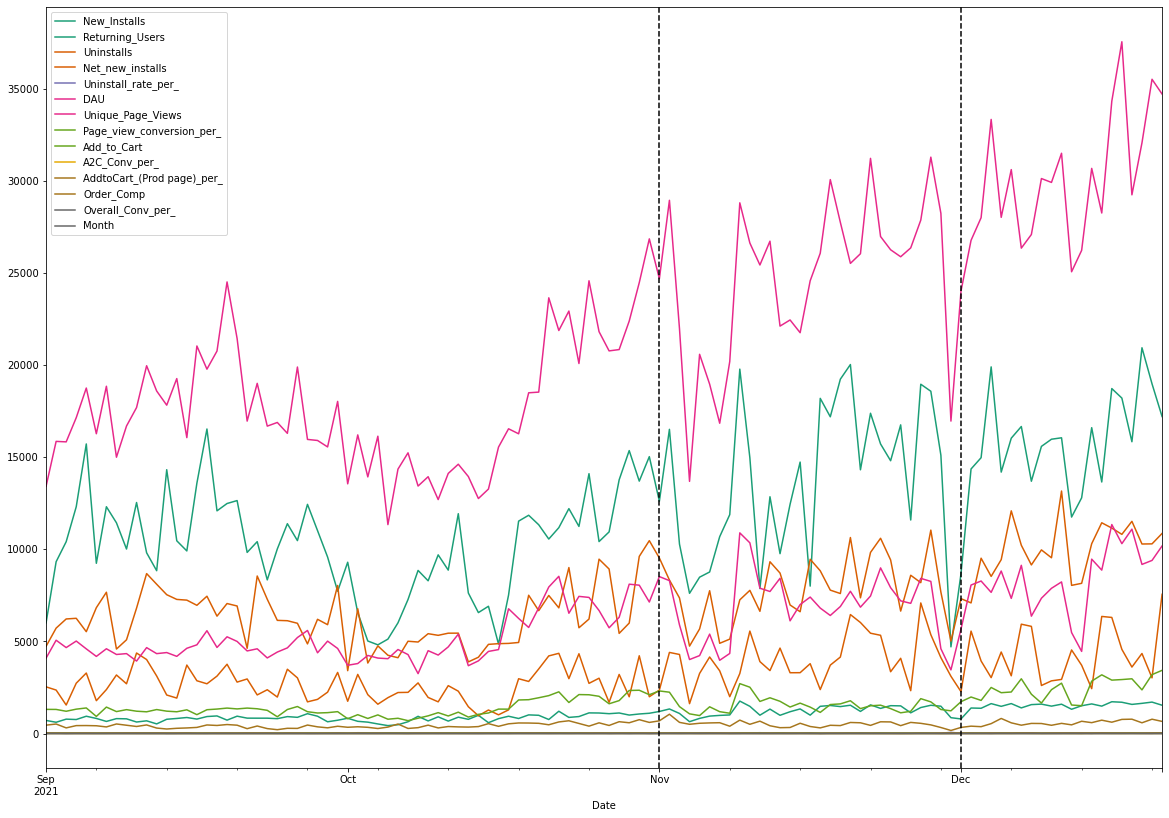

In [30]:
ax = data.plot(figsize=(20, 14), colormap='Dark2')
ax.axvline('2021-11-01', color='black',linestyle='--')
ax.axvline('2021-12-01', color='black',linestyle='--')


In [31]:
data.corr()['Overall_Conv_per_']

New_Installs                 -0.313115
Returning_Users              -0.300389
Uninstalls                   -0.212685
Net_new_installs             -0.350680
Uninstall_rate_per_          -0.022309
DAU                          -0.400090
Unique_Page_Views            -0.131459
Page_view_conversion_per_     0.440975
Add_to_Cart                  -0.097112
A2C_Conv_per_                 0.352307
AddtoCart_(Prod page)_per_   -0.009143
Order_Comp                    0.512975
Overall_Conv_per_             1.000000
Month                        -0.172353
Name: Overall_Conv_per_, dtype: float64

## Conclusions

Data is cleaned by performing the folowing steps:

1) Replacing spaces in the column names with ' _ '

2) Removing ' , ' and ' % '  from the column values

3) Updating the data types of the necessary columns to int & float

Overall Conversion percentage has been decreased in december.

The main factors that are affecting Overall Conversion percentage are :
    
1) Page view conversion percentage has been decreased

2) Daily Active Users are increased from 17586 in September to 29965 in December on an average

3) Net new installs Increased from 5993 in September to 9949 in December on an average

4) Returning Users Increased from 861 in September to 1515 in December  on an average

Other insights

Add to Cart Conversion percentage has been increased from 6.47 in November to 8.12 in December on an average

Order Completions has been increased from 521.50 in November to 586.80 in December on an average